In [1]:
# import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load dataset
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
diabetes_data = pd.read_csv("data/diabetes.csv", header=None, names=col_names)
diabetes_data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [3]:
#Eliminate first row
diabetes_data = diabetes_data.iloc[1:]
diabetes_data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = diabetes_data[feature_cols] # Features
y = diabetes_data.label # Target variable

In [5]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [6]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter = 1000)

# fit the model with data
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
#predicting the output for out test set
y_pred=logreg.predict(X_test)
y_pred

array(['1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0',
       '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1',
       '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0',
       '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0',
       '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0

In [8]:
X_test

,pregnant,insulin,bmi,age,glucose,bp,pedigree
662,1,0,42.9,22,199,76,1.394
123,2,100,33.6,23,107,74,0.404
114,4,0,34,25,76,62,0.391
15,5,175,25.8,51,166,72,0.587
530,0,0,24.6,31,111,65,0.66
...,...,...,...,...,...,...,...
367,6,0,27.6,29,124,72,0.368
302,2,135,31.6,25,144,58,0.422
383,1,182,25.4,21,109,60,0.947
141,3,0,21.1,55,128,78,0.268


In [9]:
# import the metrics class to create confusion matrics
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[118,  12],
       [ 26,  36]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

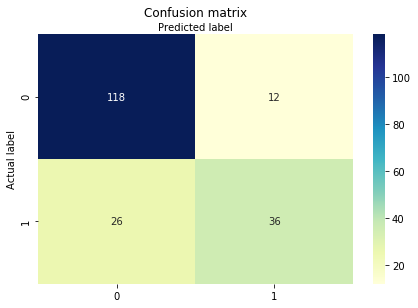

In [10]:
#Ploting the Confusion Matrics
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [11]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8020833333333334


In [12]:
import pickle
import os
#Saving the model
if not os.path.exists('models'):
    os.makedirs('models')
    
MODEL_PATH = "models/logistic_reg.sav"
pickle.dump(logreg, open(MODEL_PATH, 'wb'))

In [13]:
# print(X_test[0])
# y_pred=logreg.predict([[]])
# y_pred

In [14]:
# initialize list of lists 
data = [[6, 0, 33.6, 50, 148, 72, 0.627]] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['pregnant','insulin','bmi','age','glucose','bp','pedigree']) 

#Predict On new Data
new_pred = logreg.predict(df)
new_pred


array(['1'], dtype=object)